# Zarr Example

imported on: **2023-03-02**

<p>This notebook is from NASA's Zarr <strong>EOSDIS</strong> store notebook</p>

> The original source for this document is [https://github.com/nasa/zarr-eosdis-store/blob/main/presentation/example.ipynb](https://github.com/nasa/zarr-eosdis-store/blob/main/presentation/example.ipynb)

# zarr-eosdis-store example

Install dependencies

In [ ]:
import sys

# zarr and zarr-eosdis-store, the main libraries being demoed
!{sys.executable} -m pip install zarr zarr-eosdis-store

# Notebook-specific libraries
!{sys.executable} -m pip install matplotlib

**Important**: To run this, you must first create an Earthdata Login 
account (https://urs.earthdata.nasa.gov) and place your credentials
in ~/.netrc e.g.:

```
   machine urs.earthdata.nasa.gov login YOUR_USER password YOUR_PASSWORD
```
Never share or commit your password / .netrc file!

Basic usage.  After these lines, we work with `ds` as though it were a normal Zarr dataset

In [2]:
import zarr
from eosdis_store import EosdisStore

url = 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20210715090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'

ds = zarr.open(EosdisStore(url))

View the file's variable structure

In [3]:
print(ds.tree())

/
 ├── analysed_sst (1, 17999, 36000) int16
 ├── analysis_error (1, 17999, 36000) int16
 ├── dt_1km_data (1, 17999, 36000) int16
 ├── lat (17999,) float32
 ├── lon (36000,) float32
 ├── mask (1, 17999, 36000) int16
 ├── sea_ice_fraction (1, 17999, 36000) int16
 ├── sst_anomaly (1, 17999, 36000) int16
 └── time (1,) int32


Fetch the latitude and longitude arrays and determine start and end indices for our area of interest.  In this case, we're looking at the Great Lakes, which have a nice, recognizeable shape.  Latitudes 41 to 49, longitudes -93 to 76.

In [4]:
lats = ds['lat'][:]
lons = ds['lon'][:]
lat_range = slice(lats.searchsorted(41), lats.searchsorted(49))
lon_range = slice(lons.searchsorted(-93), lons.searchsorted(-76))

Get the analysed sea surface temperature variable over our area of interest and apply scale factor and offset from the file metadata.  In a future release, scale factor and add offset will be automatically applied.

In [5]:
var = ds['analysed_sst']
analysed_sst = var[0, lat_range, lon_range] * var.attrs['scale_factor'] + var.attrs['add_offset']

Draw a pretty picture

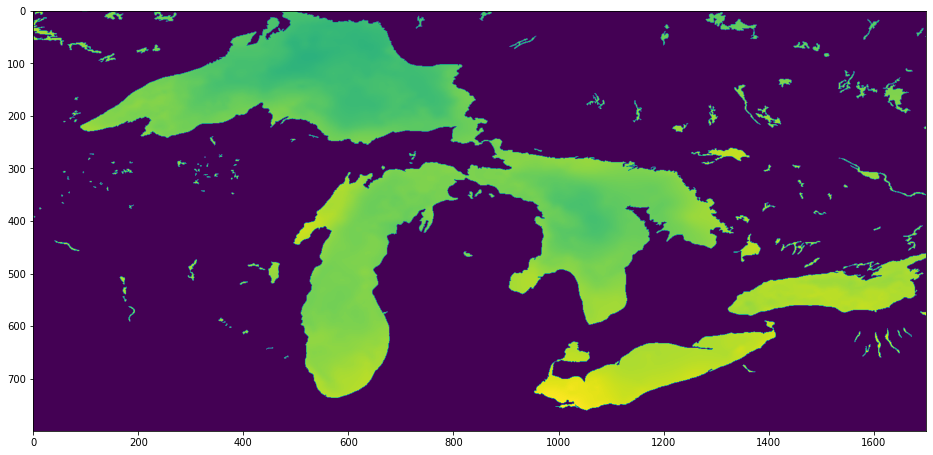

In [6]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [16, 8]
plt.imshow(analysed_sst[::-1, :])
None

In a dozen lines of code and a few seconds, we have managed to fetch and visualize the 3.2 megabyte we needed from a 732 megabyte file using the original archive URL and no processing services